# PASCAL VOC 2012 데이터

## PASCAL VOC 다운로드

- official hompage: host.robots.ox.ac.uk/pascal/VOC/voc2012/
- 데이터셋 다운로드 링크: host.robots.ox.ac.uk/pascal/VOC/voc2012/#devkit

## PASCAL VOC DataSet 구조

  ### 5개 폴더로 구성되어 있음
  - Annotations: 각 데이터의 Object class, Bounding Box 와 기타 정보들이 들어 있는 xml 파일
  - ImageSets: 각 Task에 해당하는 데이터의 파일명이 나열된 txt 파일
  - JPEGImages: JPEG 원본 이미지
  - SegmentationClass: Semantic Segmentation을 위한 라벨 PNG 파일
    ex) 자전거 3대, 자전거 탄 사람 3명 -> 자전거 와 사람으로만 구분한다하면
  - SegmentationObject: Instance Segmentation을 위한 라벨 PNG 파일
    ex) 각 자전거1, 자전거2, 자전거3, 사람1, 사람2, 사람3을 구분

## JPEGImages에 있는 이미지 확인해 보기

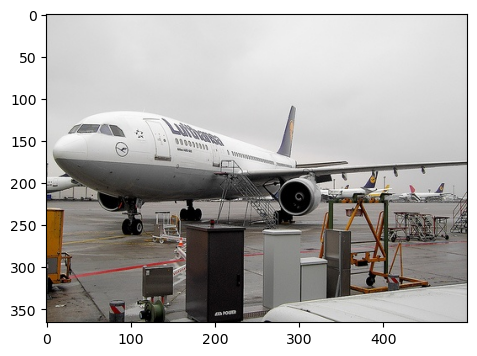

In [19]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

image = cv2.imread('Desktop/VOCdevkit/VOC2012/JPEGImages/2007_000033.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(22,4))
plt.imshow(image)
plt.show()

## SegmentationObject 파일 확인해 보기

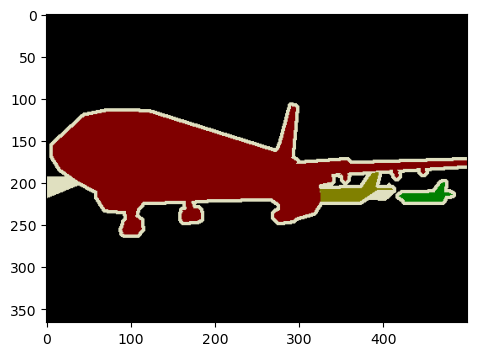

In [23]:
import cv2
import matplotlib.pyplot as plt
import os
%matplotlib inline

image = cv2.imread('Desktop/VOCdevkit/VOC2012/SegmentationObject/2007_000033.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(22,4))
plt.imshow(image)
plt.show()

## Annotation xml 파일에 있는 요소들을 파싱하여 접근하기

In [27]:
!pip install lxml
import os
import random

# 절대경로 만들기
VOC2012_DIR = 'Desktop/VOCdevkit/VOC2012/'
annotation_dir = os.path.join(VOC2012_DIR, 'Annotations') 
jpeg_dir = os.path.join(VOC2012_DIR, 'JPEGImages') 

# annotation 폴더 파일 리스트화 하기
xml_files = os.listdir(annotation_dir)
print(xml_files)

['2007_000027.xml', '2007_000032.xml', '2007_000033.xml', '2007_000039.xml', '2007_000042.xml', '2007_000061.xml', '2007_000063.xml', '2007_000068.xml', '2007_000121.xml', '2007_000123.xml', '2007_000129.xml', '2007_000170.xml', '2007_000175.xml', '2007_000187.xml', '2007_000241.xml', '2007_000243.xml', '2007_000250.xml', '2007_000256.xml', '2007_000272.xml', '2007_000323.xml', '2007_000332.xml', '2007_000333.xml', '2007_000346.xml', '2007_000363.xml', '2007_000364.xml', '2007_000392.xml', '2007_000423.xml', '2007_000452.xml', '2007_000464.xml', '2007_000480.xml', '2007_000491.xml', '2007_000504.xml', '2007_000515.xml', '2007_000528.xml', '2007_000529.xml', '2007_000549.xml', '2007_000559.xml', '2007_000572.xml', '2007_000584.xml', '2007_000629.xml', '2007_000636.xml', '2007_000645.xml', '2007_000648.xml', '2007_000661.xml', '2007_000663.xml', '2007_000664.xml', '2007_000676.xml', '2007_000713.xml', '2007_000720.xml', '2007_000727.xml', '2007_000733.xml', '2007_000738.xml', '2007_00076

## xml 1개 파일  파싱하기

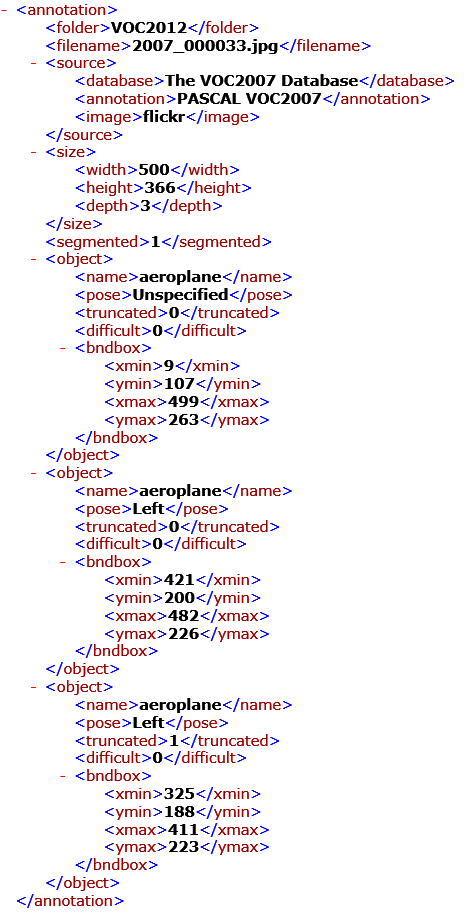

In [55]:
import os
import xml.etree.ElementTree as ET

xml_file = os.path.join(annotation_dir, '2007_000033.xml')

# XML 파일 파싱
tree = ET.parse(xml_file)
root = tree.getroot()

# image 관련 정보는 root의 자식으로 존재

image_name = root.find('filename').text
# VOC2012_DIR 해당 폴더 경로
full_image_name = os.path.join(VOC2012_DIR, image_name)
image_size = root.find('size')
image_width = image_size.find('width').text
image_height = image_size.find('height').text

# object는 이미지 파일에 있는 객체에 따라 여러개 나올 수 있음 위 예에서는 비행기 3개만 object로 인식
# 해당 부분은 for loop를 사용해서 전체 objcet 객체를 가지고 나와야 함
# 각 object들은 name, pose, truncated, difficult, {bndbox: {xmin:225, ymin:225, xmax:225, ymax:225}} 와 같은 값을 가지고 있음

objects = []

for object in root.findall('object'): # object로 있는 거 모두 찾기
    
    bndbox = object.find('bndbox')
    # 각 object별 좌표 뽑기
    x1 = int(bndbox.find('xmin').text)
    y1 = int(bndbox.find('ymin').text)
    x2 = int(bndbox.find('xmax').text)
    y2 = int(bndbox.find('ymax').text)
    
    object_pos = (x1, y1, x2, y2)
    label_name = object.find('name').text
    object_dict = {'label_name':label_name, 'object_pos':object_pos}
    objects.append(object_dict)

In [60]:
print(objects)

[{'label_name': 'aeroplane', 'object_pos': (9, 107, 499, 263)}, {'label_name': 'aeroplane', 'object_pos': (421, 200, 482, 226)}, {'label_name': 'aeroplane', 'object_pos': (325, 188, 411, 223)}]


In [58]:
for object_list in objects:
    print(object_list)

{'label_name': 'aeroplane', 'object_pos': (9, 107, 499, 263)}
{'label_name': 'aeroplane', 'object_pos': (421, 200, 482, 226)}
{'label_name': 'aeroplane', 'object_pos': (325, 188, 411, 223)}


## Annotation Object Bounding Box 시각화

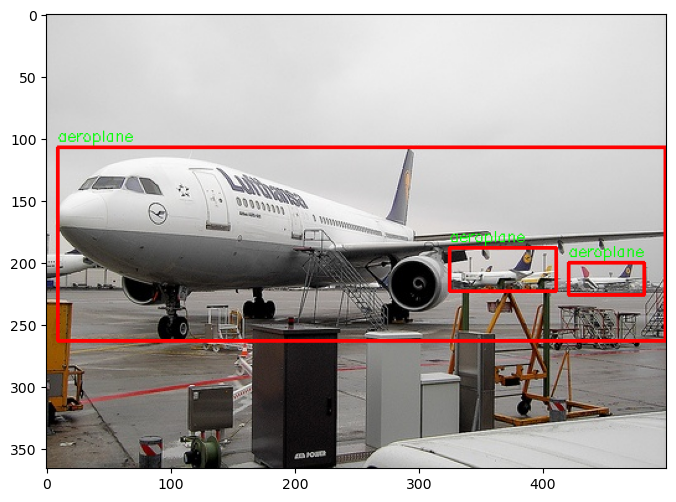

In [77]:
import cv2
import os
import xml.etree.ElementTree as ET

PASCALVOC_DIR ='Desktop/VOCdevkit/VOC2012/'
annotation_dir = os.path.join(PASCALVOC_DIR, 'Annotations')
jpeg_dir = os.path.join(PASCALVOC_DIR, 'JPEGImages')

xml_file = os.path.join(annotation_dir, '2007_000033.xml')

tree = ET.parse(xml_file)
root = tree.getroot()

image_name = root.find('filename').text
full_image_name = os.path.join(jpeg_dir, image_name)

image = cv2.cvtColor(cv2.imread(full_image_name), cv2.COLOR_BGR2RGB)
image_copy = image.copy()
red_color = (255,0,0)
green_color = (0,255,0)

for object in root.findall('object'):
    bndbox = object.find('bndbox')
    
    x1 = int(bndbox.find('xmin').text)
    y1 = int(bndbox.find('ymin').text)
    x2 = int(bndbox.find('xmax').text)
    y2 = int(bndbox.find('ymax').text)
    
    label_name = object.find('name').text
    
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=red_color, thickness=2)
    cv2.putText(image_copy, label_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_color, thickness=1)
    
plt.figure(figsize=(8,8))
plt.imshow(image_copy)

# 정리하기

## 파일 폴더 경로 지정하기

In [74]:
PASCALVOC_DIR ='Desktop/VOCdevkit/VOC2012/'
annotation_dir = os.path.join(PASCALVOC_DIR, 'Annotations')
jpeg_dir = os.path.join(PASCALVOC_DIR, 'JPEGImages')
xml_file = os.path.join(annotation_dir, '2007_000033.xml')

## Annotation 파일 파싱하기

In [75]:
tree = ET.parse(xml_file)
root = tree.getroot()

# Annotaion.xml에서 파일이름, 파일 전체 경로 지정하기
image_name = root.find('filename').text
full_image_name = os.path.join(jpeg_dir, image_name)

## Image 준비하기, bbox 컬러, Text 컬러 지정하기

In [76]:
image = cv2.cvtColor(cv2.imread(full_image_name), cv2.COLOR_BGR2RGB)
image_copy = image.copy()
red_color = (255,0,0)
green_color = (0,255,0)

## object에 있는 데이터 모두 가져오기(bounding box정보, label name 정보)

In [78]:
for object in root.findall('object'):
    bndbox = object.find('bndbox')
    
    x1 = int(bndbox.find('xmin').text)
    y1 = int(bndbox.find('ymin').text)
    x2 = int(bndbox.find('xmax').text)
    y2 = int(bndbox.find('ymax').text)
    
    label_name = object.find('name').text

## 바운딩박스, 레이블 이름 표시하기

In [79]:
cv2.rectangle(image_copy, (x1, y1), (x2, y2), color=red_color, thickness=2)
cv2.putText(image_copy, label_name, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, color=green_color, thickness=1)

array([[[221, 221, 221],
        [212, 212, 212],
        [215, 215, 215],
        ...,
        [226, 226, 226],
        [221, 221, 221],
        [223, 223, 223]],

       [[214, 214, 214],
        [205, 205, 205],
        [208, 208, 208],
        ...,
        [222, 222, 222],
        [217, 217, 217],
        [219, 219, 219]],

       [[217, 217, 217],
        [208, 208, 208],
        [210, 210, 210],
        ...,
        [223, 223, 223],
        [218, 218, 218],
        [220, 220, 220]],

       ...,

       [[ 98,  85,  69],
        [100,  87,  71],
        [ 94,  81,  65],
        ...,
        [198, 198, 198],
        [195, 193, 194],
        [195, 193, 194]],

       [[ 93,  80,  64],
        [ 92,  79,  63],
        [ 93,  80,  64],
        ...,
        [196, 196, 196],
        [194, 192, 193],
        [195, 193, 194]],

       [[ 86,  73,  57],
        [101,  88,  72],
        [103,  90,  74],
        ...,
        [196, 196, 196],
        [194, 192, 193],
        [195, 193, 194]]

## 이미지로 그리기

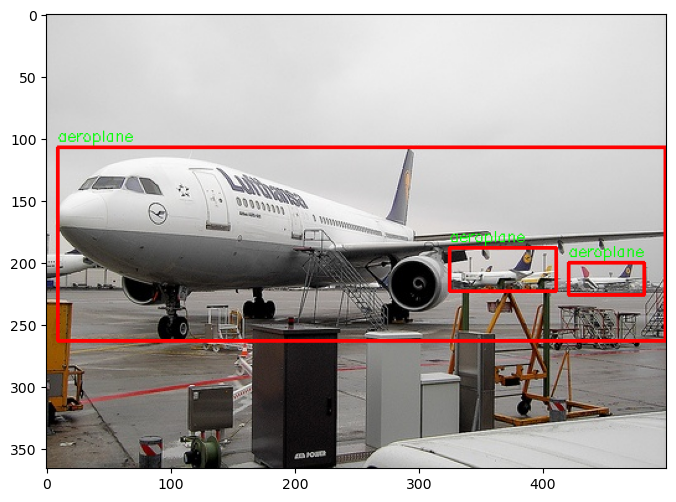

In [80]:
plt.figure(figsize=(8,8))
plt.imshow(image_copy)